In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [2]:
data = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

In [3]:
data.shape

(1000, 14)

In [4]:
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [6]:
data.describe(include='all')

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


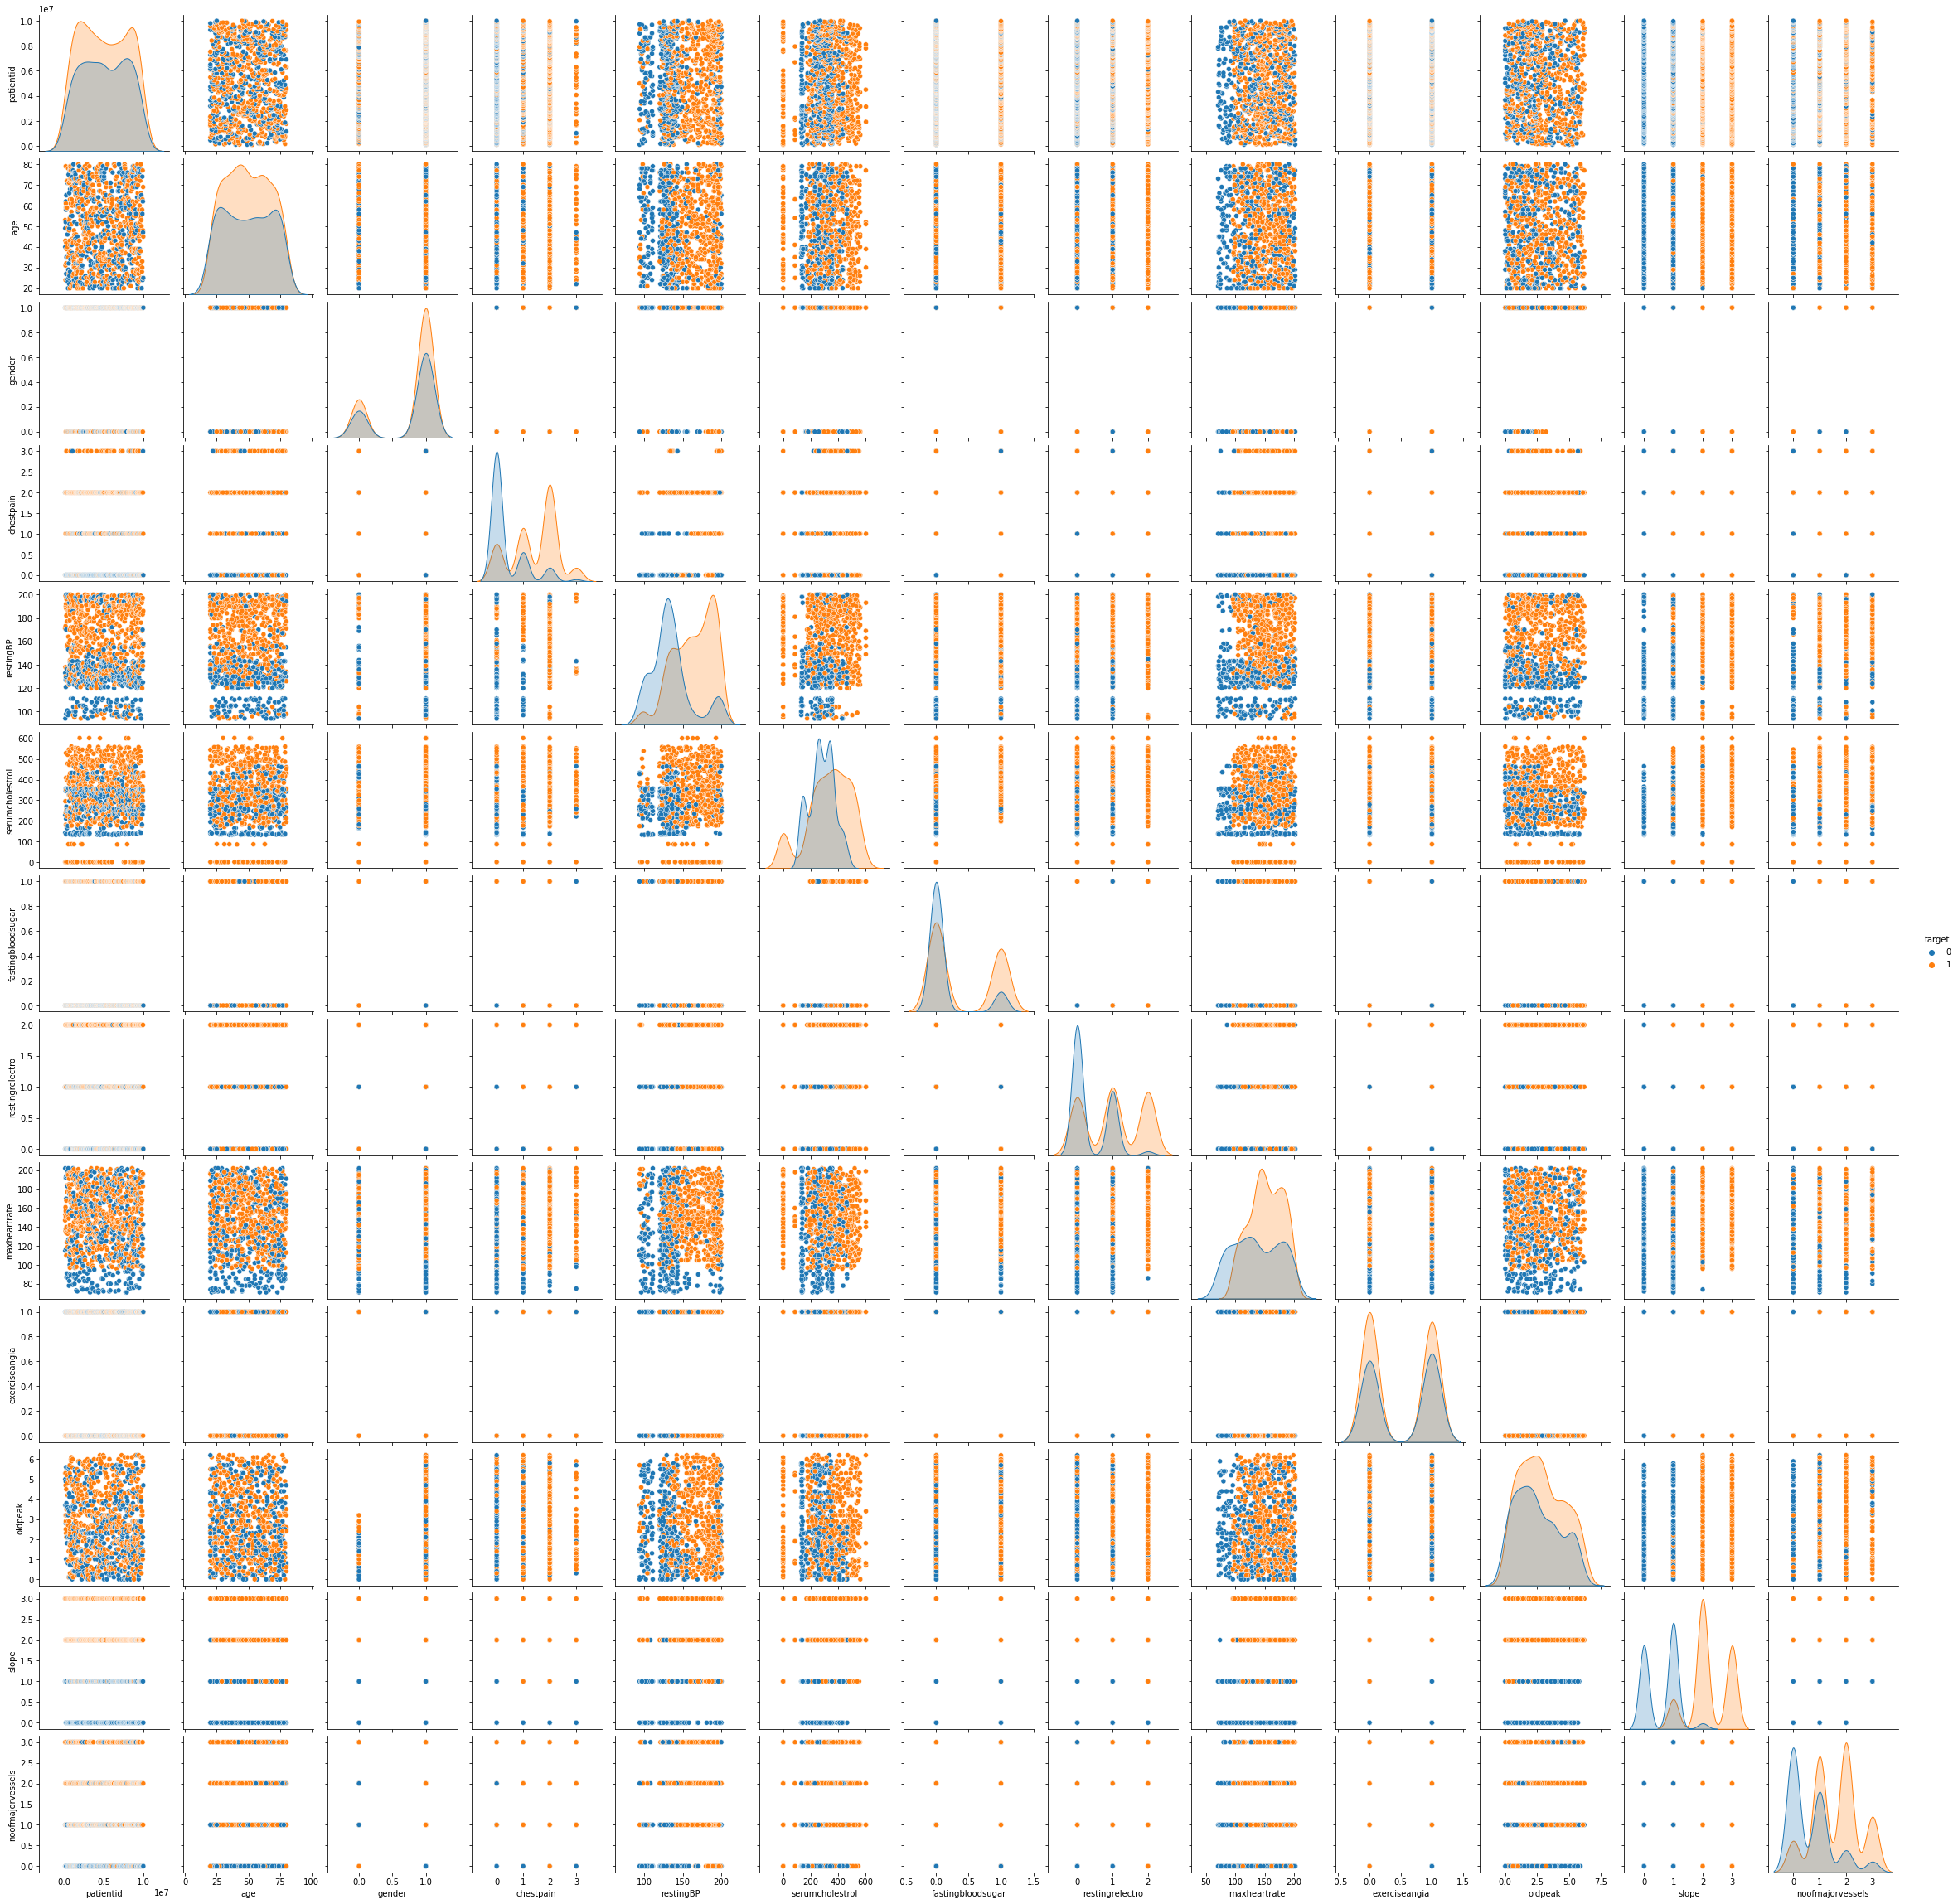

In [8]:
sns.pairplot(data,hue='target')
plt.show()

In [9]:
#Remove zero values
non_zero = ['restingBP','serumcholestrol','maxheartrate']
for column in non_zero:
    data[column] = data[column].replace(0,np.NaN)
    mean = int(data[column].mean(skipna = True))
    data[column] = data[column].replace(np.NaN,mean)
    print(data[column])

0      171
1       94
2      133
3      138
4      199
      ... 
995    139
996    143
997    156
998    186
999    158
Name: restingBP, Length: 1000, dtype: int64
0      328.0
1      229.0
2      142.0
3      295.0
4      328.0
       ...  
995    349.0
996    258.0
997    434.0
998    417.0
999    270.0
Name: serumcholestrol, Length: 1000, dtype: float64
0      147
1      115
2      202
3      153
4      136
      ... 
995    183
996     98
997    196
998    117
999    143
Name: maxheartrate, Length: 1000, dtype: int64


In [10]:
data.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,328.0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229.0,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142.0,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295.0,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,328.0,0,2,136,0,5.3,3,2,1


In [11]:
x = data.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].values
y= data.iloc[:,[13]].values

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)

In [13]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [21]:
#Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 13, metric ='minkowski', p=2)
classifier.fit(x_train_sc, y_train)

C:\Users\Osas\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=13)

In [22]:
#Predicting the Test set results
y_pred= classifier.predict(x_test_sc)
print(y_pred)

[1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1
 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 0 0 0
 0 1 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1
 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1
 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 0 0 0 0 0
 1 0 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0
 1 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1
 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 1 0 1
 1 0 0 1]


In [23]:
print(y_test)

[[1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]


In [24]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print('accuracy:%.2f\n\n'%(acc))
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm,'\n\n')
print('-------------------------------------------')
result = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n')
print(result)

accuracy:0.95


Confusion Matrix:
[[131   8]
 [  8 153]] 


-------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       139
           1       0.95      0.95      0.95       161

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



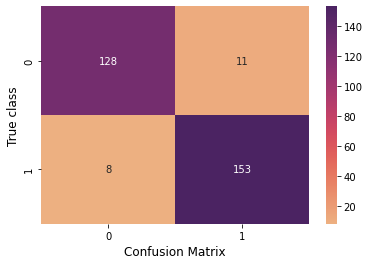

In [18]:
ax = sns.heatmap(cm, cmap ='flare', annot=True, fmt='d')

plt.xlabel('Predicted class', fontsize=12)
plt.ylabel('True class', fontsize=12)
plt.xlabel('Confusion Matrix', fontsize=12)

plt.show()


C:\Users\Osas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Osas\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


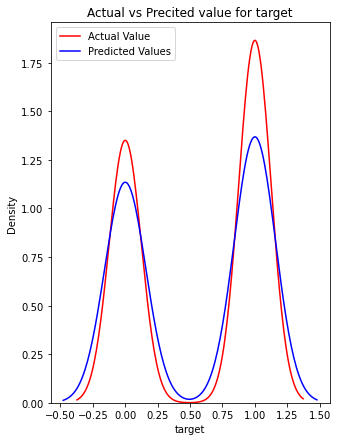

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 7))


ax = sns.distplot(data['target'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax)


plt.title('Actual vs Precited value for target')
plt.legend()
plt.show()
plt.close()